<a href="https://colab.research.google.com/github/bhattarai-aavash/deep_learning/blob/main/Notebooks/Chap15/15_1_GAN_Toy_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 15.1: GAN Toy example**

This notebook investigates the GAN toy example as illustrated in figure 15.1 in the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get a batch of real data.  Our goal is to make data that looks like this.
def get_real_data_batch(n_sample):
  np.random.seed(0)
  x_true = np.random.normal(size=(1,n_sample)) + 7.5
  return x_true

Define our generator.  This takes a standard normally-distributed latent variable $z$ and adds a scalar $\theta$ to this, where $\theta$ is the single parameter of this generative model according to:

\begin{equation}
x_i = z_i + \theta.
\end{equation}

Obviously this model can generate the family of Gaussian distributions with unit variance, but different means.

In [3]:
# This is our generator -- takes the single parameter theta
# of the generative model and generates n samples
def generator(z, theta):
    x_gen = z + theta
    return x_gen

Now, we define our discriminator.  This is a simple logistic regression model (1D linear model passed through sigmoid) that returns the probability that the data is real

In [4]:
# Define our discriminative model

# Logistic sigmoid, maps from [-infty,infty] to [0,1]
def sig(data_in):
  return  1.0 / (1.0+np.exp(-data_in))

# Discriminator computes y
def discriminator(x, phi0, phi1):
  return sig(phi0 + phi1 * x)

In [5]:
# Draws a figure like Figure 15.1a
def draw_data_model(x_real, x_syn, phi0=None, phi1=None):
  fix, ax = plt.subplots();

  for x in x_syn:
    ax.plot([x,x],[0,0.33],color='#f47a60')
  for x in x_real:
    ax.plot([x,x],[0,0.33],color='#7fe7dc')

  if phi0 is not None:
    x_model = np.arange(0,10,0.01)
    y_model = discriminator(x_model, phi0, phi1)
    ax.plot(x_model, y_model,color='#dddddd')
  ax.set_xlim([0,10])
  ax.set_ylim([0,1])


  plt.show()

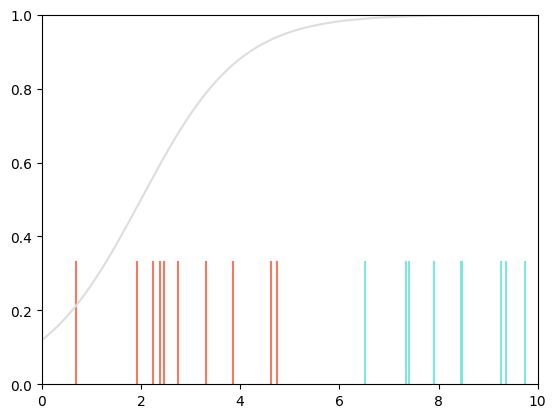

In [6]:
# Get data batch
x_real = get_real_data_batch(10)

# Initialize generator and synthesize a batch of examples
theta = 3.0
np.random.seed(1)
z = np.random.normal(size=(1,10))
x_syn = generator(z, theta)

# Initialize discriminator model
phi0 = -2
phi1 = 1

draw_data_model(x_real, x_syn, phi0, phi1)

You can see that the synthesized (orange) samples don't look much like the real (cyan) ones, and the initial model to discriminate them (gray line represents probability of being real) is pretty bad as well.

Let's deal with the discriminator first.  Let's define the loss

In [7]:
# Discriminator loss
def compute_discriminator_loss(x_real, x_syn, phi0, phi1):

  # TODO -- compute the loss for the discriminator
  # Run the real data and the synthetic data through the discriminator
  # Then use the standard binary cross entropy loss with the y=1 for the real samples
  # and y=0 for the synthesized ones.
  # Replace this line
  y_real = discriminator(x_real, phi0, phi1)
  y_syn = discriminator(x_syn, phi0, phi1)
  loss_real = -np.sum(np.log(y_real))
  loss_synt = np.sum(-np.log(1-y_syn))

  loss = loss_real + loss_synt

  return loss

In [8]:
# Test the loss
loss = compute_discriminator_loss(x_real, x_syn, phi0, phi1)
print("True Loss = 13.814757170851447, Your loss=", loss )

True Loss = 13.814757170851447, Your loss= 13.814757170851447


In [9]:
# Gradient of loss (cheating, using finite differences)
def compute_discriminator_gradient(x_real, x_syn, phi0, phi1):
  delta = 0.0001;
  loss1 = compute_discriminator_loss(x_real, x_syn, phi0, phi1)
  loss2 = compute_discriminator_loss(x_real, x_syn, phi0+delta, phi1)
  loss3 = compute_discriminator_loss(x_real, x_syn, phi0, phi1+delta)
  dl_dphi0 = (loss2-loss1) / delta
  dl_dphi1 = (loss3-loss1) / delta

  return dl_dphi0, dl_dphi1

# This routine performs gradient descent with the discriminator
def update_discriminator(x_real, x_syn, n_iter, phi0, phi1):

  # Define learning rate
  alpha = 0.01

  # Get derivatives
  print("Initial discriminator loss = ", compute_discriminator_loss(x_real, x_syn, phi0, phi1))
  for iter in range(n_iter):
    # Get gradient
    dl_dphi0, dl_dphi1 = compute_discriminator_gradient(x_real, x_syn, phi0, phi1)
    # Take a gradient step downhill
    phi0 = phi0 - alpha * dl_dphi0 ;
    phi1 = phi1 - alpha * dl_dphi1 ;

  print("Final Discriminator Loss= ", compute_discriminator_loss(x_real, x_syn, phi0, phi1))

  return phi0, phi1

Initial parameters (phi0,phi1) -2 1
Initial discriminator loss =  13.814757170851447
Final Discriminator Loss=  3.7329024780298656
Final parameters (phi0,phi1) -3.5540834577198126 0.7143290523579306


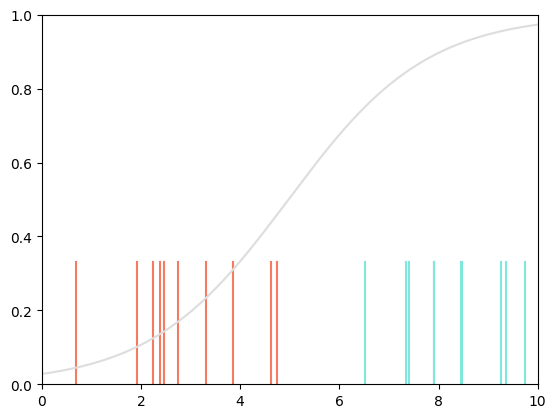

In [10]:
# Let's update the discriminator (sigmoid curve)
n_iter = 100
print("Initial parameters (phi0,phi1)", phi0, phi1)
phi0, phi1 = update_discriminator(x_real, x_syn, n_iter, phi0, phi1)
print("Final parameters (phi0,phi1)", phi0, phi1)
draw_data_model(x_real, x_syn, phi0, phi1)

Now let's update the generator

In [11]:
def compute_generator_loss(z, theta, phi0, phi1):
  # TODO -- Run the generator on the latent variables z with the parameters theta
  # to generate new data x_syn
  # Then run the discriminator on the new data to get the probability of being real
  # The loss is the total negative log probability of being synthesized (i.e. of not being real)
  # Replace this code
  x_syn = generator(z,theta)

  y = discriminator(x_syn,phi0,phi1)



  loss = np.sum(-np.log(1 - y))


  return loss

In [12]:
# Test generator loss to check you have it correct
loss = compute_generator_loss(z, theta, -2, 1)
print("True Loss = 13.78437035945412, Your loss=", loss )

True Loss = 13.78437035945412, Your loss= 13.78437035945412


In [13]:
def compute_generator_gradient(z, theta, phi0, phi1):
  delta = 0.0001
  loss1 = compute_generator_loss(z,theta, phi0, phi1) ;
  loss2 = compute_generator_loss(z,theta+delta, phi0, phi1) ;
  dl_dtheta = (loss2-loss1)/ delta
  return dl_dtheta

def update_generator(z, theta, n_iter, phi0, phi1):
    # Define learning rate
    alpha = 0.02

    # Get derivatives
    print("Initial generator loss = ", compute_generator_loss(z, theta, phi0, phi1))
    for iter in range(n_iter):
      # Get gradient
      dl_dtheta = compute_generator_gradient(z, theta, phi0, phi1)
      # Take a gradient step (uphill, since we are trying to make synthesized data less well classified by discriminator)
      theta = theta + alpha * dl_dtheta ;

    print("Final generator loss = ", compute_generator_loss(z, theta, phi0, phi1))
    return theta


Theta before 3.0
Initial generator loss =  2.602721236071937
Final generator loss =  3.1596382883030376
Theta after 3.3320463333416512


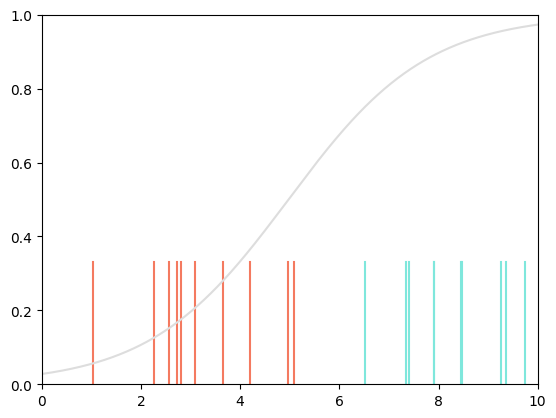

In [14]:
n_iter = 10
theta = 3.0
print("Theta before", theta)
theta = update_generator(z, theta, n_iter, phi0, phi1)
print("Theta after", theta)

x_syn = generator(z,theta)
draw_data_model(x_real, x_syn, phi0, phi1)

Final parameters (phi0,phi1) -2 1


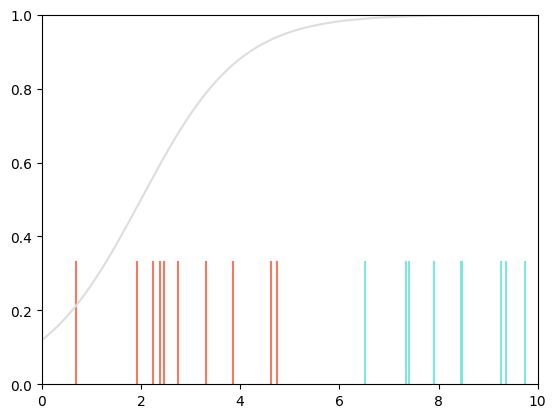

Updating discriminator
Initial discriminator loss =  13.814757170851447
Final Discriminator Loss=  2.318847463522516


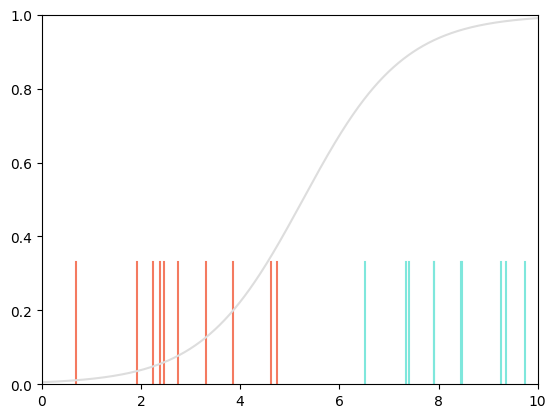

Updating generator
Initial generator loss =  1.5508571592285103
Final generator loss =  1.660207763823371


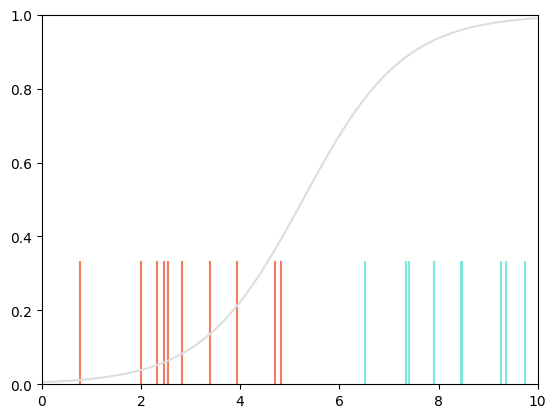

Updating discriminator
Initial discriminator loss =  2.4281980681173763
Final Discriminator Loss=  1.6703666401311348


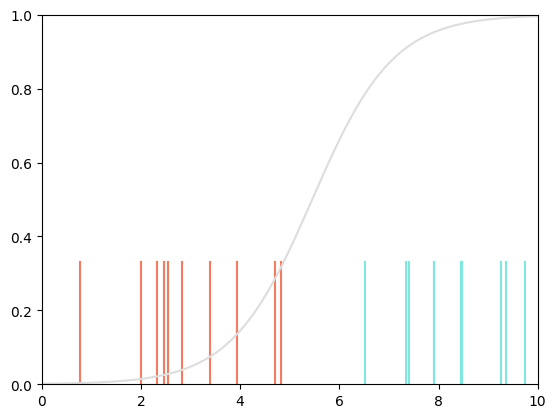

Updating generator
Initial generator loss =  1.0772376005996662
Final generator loss =  1.1621833921935676


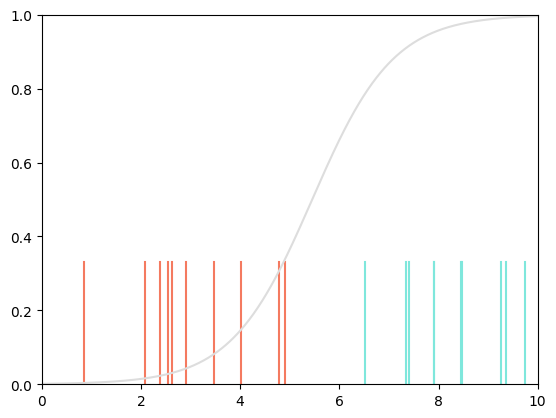

Updating discriminator
Initial discriminator loss =  1.7553124317250361
Final Discriminator Loss=  1.3890467442106322


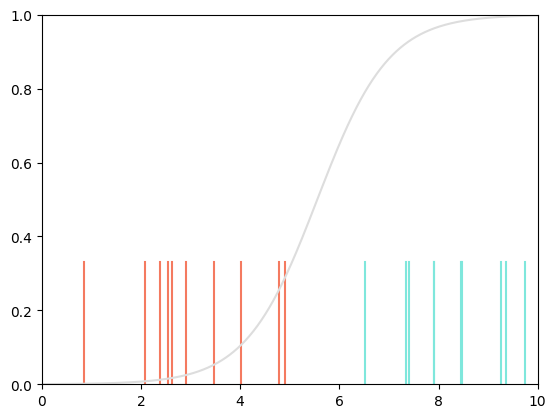

Updating generator
Initial generator loss =  0.8753580831502717
Final generator loss =  0.9491738511798753


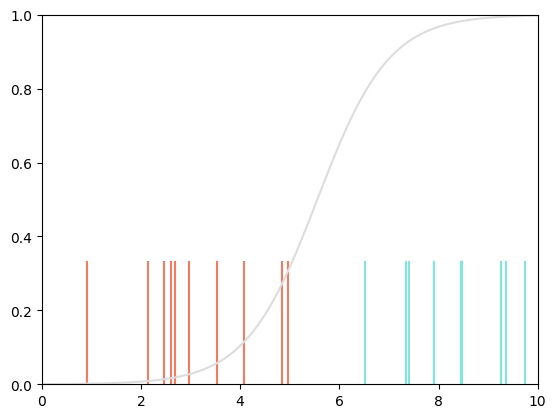

Updating discriminator
Initial discriminator loss =  1.4628625122402357
Final Discriminator Loss=  1.2335479664124247


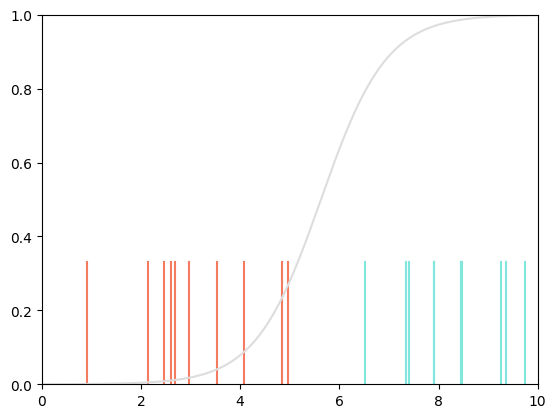

Updating generator
Initial generator loss =  0.7641039663174607
Final generator loss =  0.8322004412428978


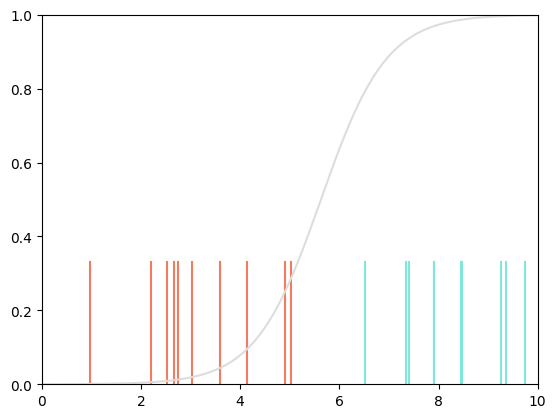

Updating discriminator
Initial discriminator loss =  1.3016444413378618
Final Discriminator Loss=  1.1382636584166503


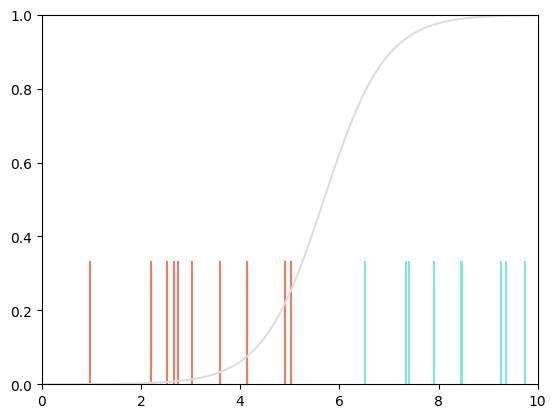

Updating generator
Initial generator loss =  0.695311683689507
Final generator loss =  0.7605497970190541


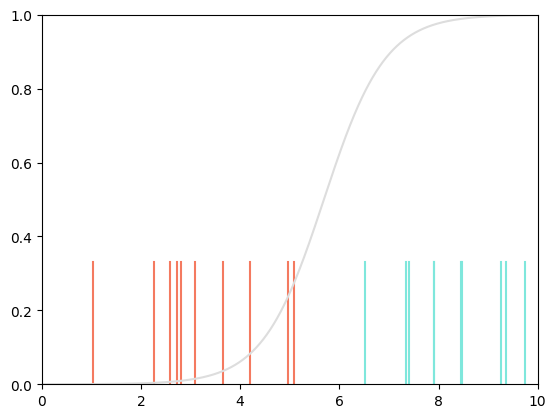

Updating discriminator
Initial discriminator loss =  1.2035017717461975
Final Discriminator Loss=  1.0776268737868993


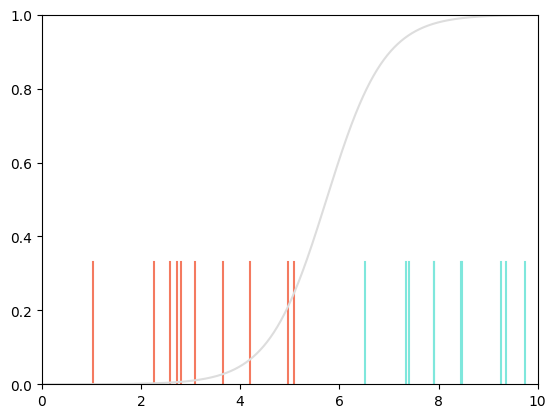

Updating generator
Initial generator loss =  0.65045902122889
Final generator loss =  0.7146564907872053


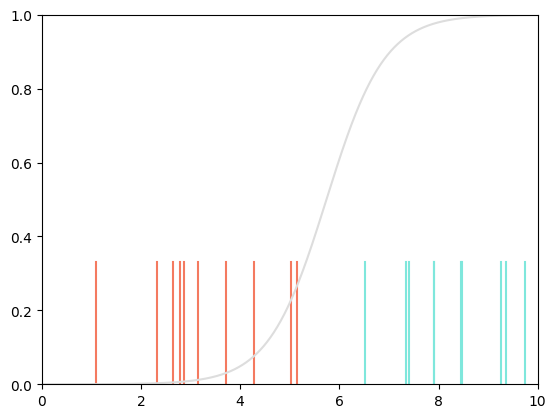

Updating discriminator
Initial discriminator loss =  1.1418243433452144
Final Discriminator Loss=  1.0395905662320177


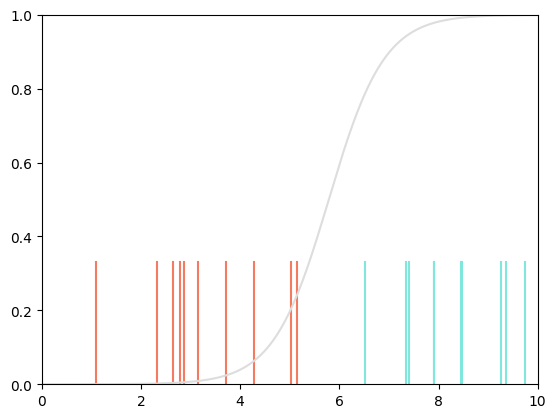

Updating generator
Initial generator loss =  0.6208797597740561
Final generator loss =  0.6853734216484098


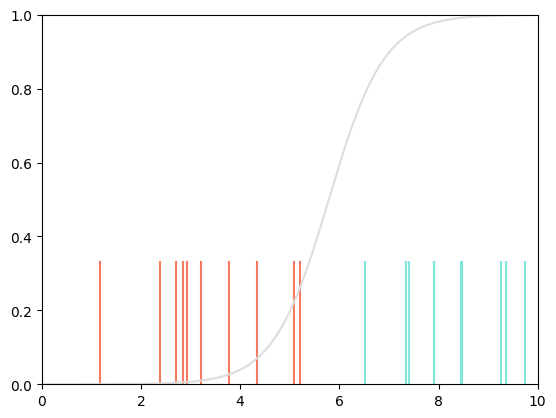

Updating discriminator
Initial discriminator loss =  1.1040842281063714
Final Discriminator Loss=  1.0178148797221453


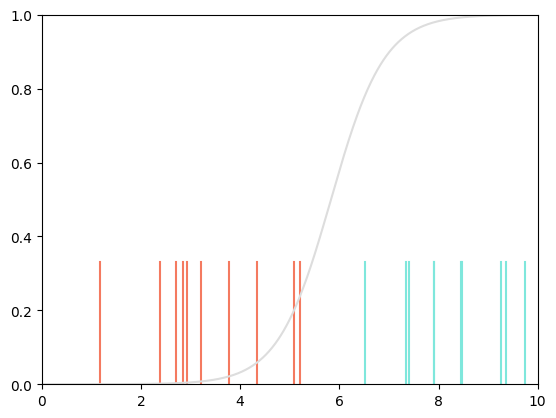

Updating generator
Initial generator loss =  0.6020124301811248
Final generator loss =  0.6679156176519019


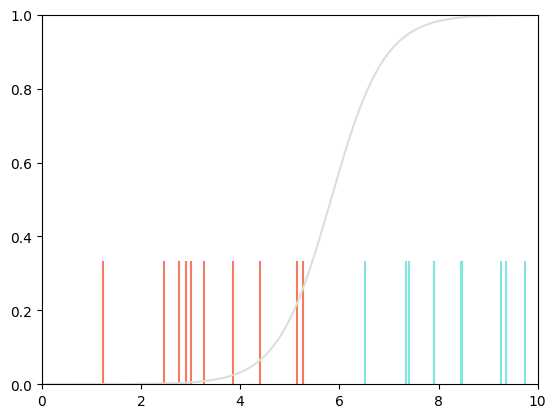

Updating discriminator
Initial discriminator loss =  1.0837180671929225
Final Discriminator Loss=  1.0087657444658116


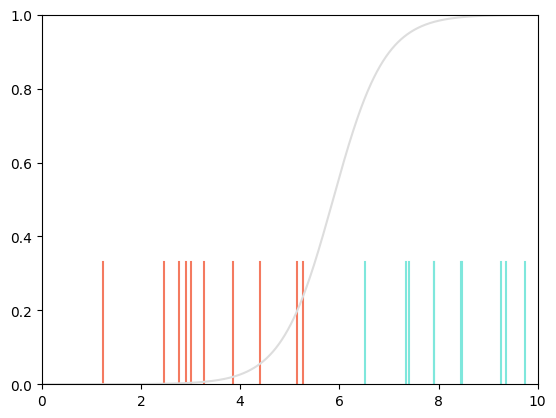

Updating generator
Initial generator loss =  0.5912844448721275
Final generator loss =  0.6596274380886582


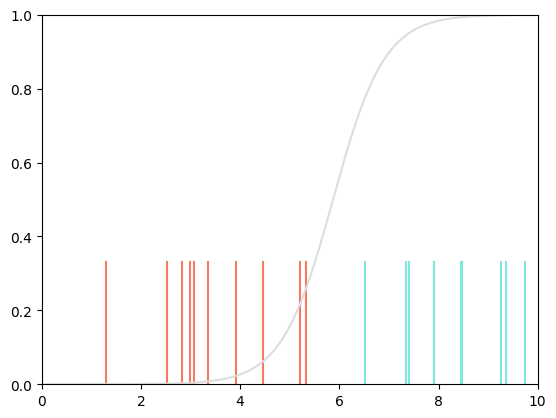

Updating discriminator
Initial discriminator loss =  1.0771087376823423
Final Discriminator Loss=  1.0104654230262993


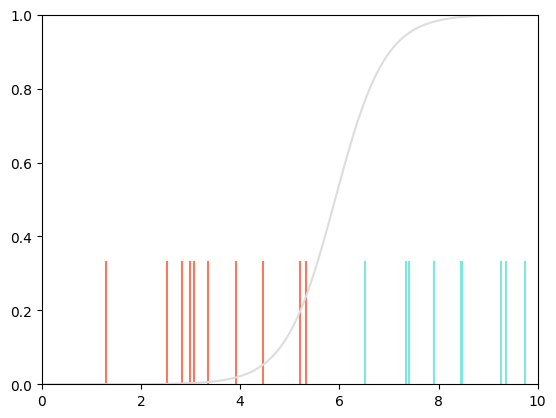

Updating generator
Initial generator loss =  0.5872056408244054
Final generator loss =  0.6590274239430117


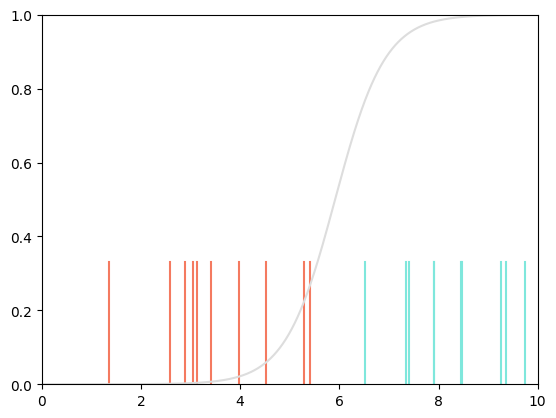

Updating discriminator
Initial discriminator loss =  1.0822872061449056
Final Discriminator Loss=  1.0219011526450212


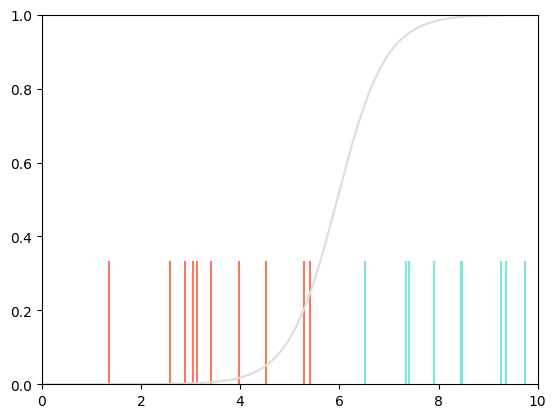

Updating generator
Initial generator loss =  0.5889384431815561
Final generator loss =  0.6653593426051192


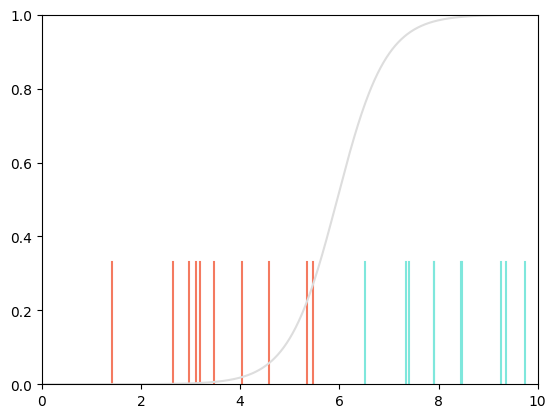

Updating discriminator
Initial discriminator loss =  1.0983220520685846
Final Discriminator Loss=  1.0427327677615597


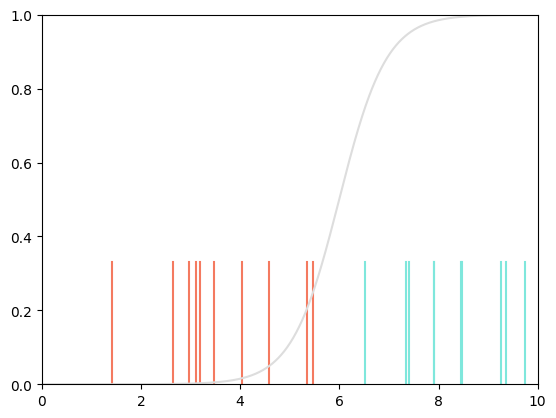

Updating generator
Initial generator loss =  0.5960815960192793
Final generator loss =  0.6783723187325772


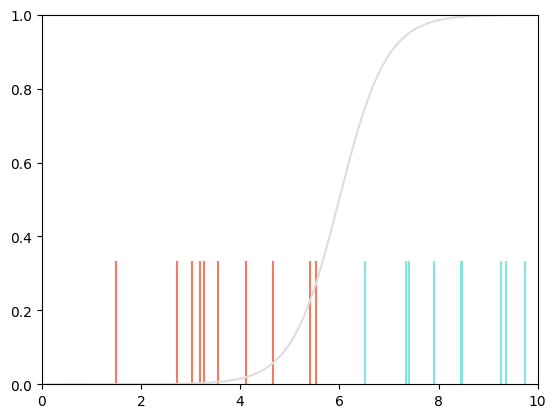

Updating discriminator
Initial discriminator loss =  1.1250234904748577
Final Discriminator Loss=  1.0731535131323477


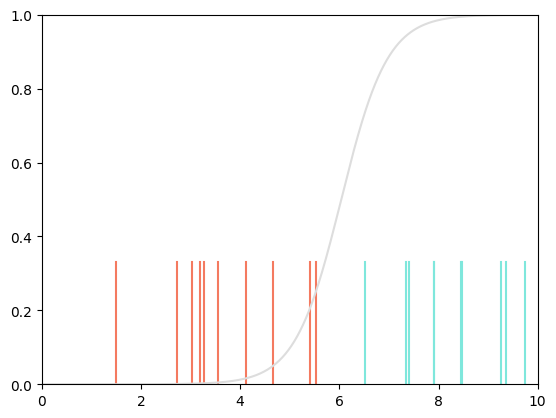

Updating generator
Initial generator loss =  0.6085608597417518
Final generator loss =  0.6982182962387901


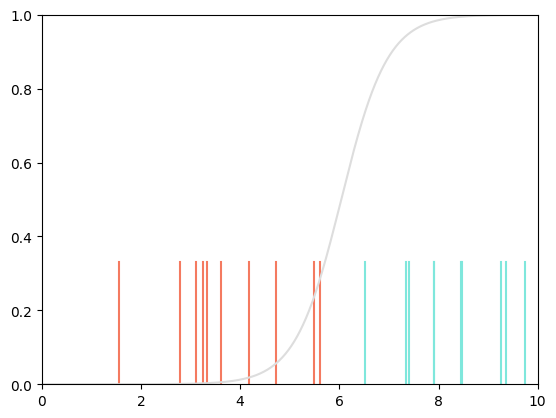

Updating discriminator
Initial discriminator loss =  1.162810949629386
Final Discriminator Loss=  1.113840679708839


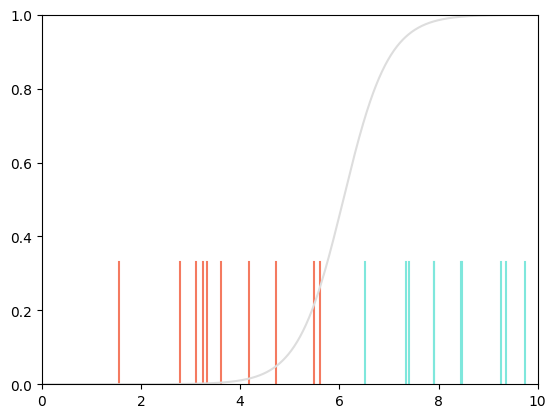

Updating generator
Initial generator loss =  0.6265798892366059
Final generator loss =  0.7254187513094769


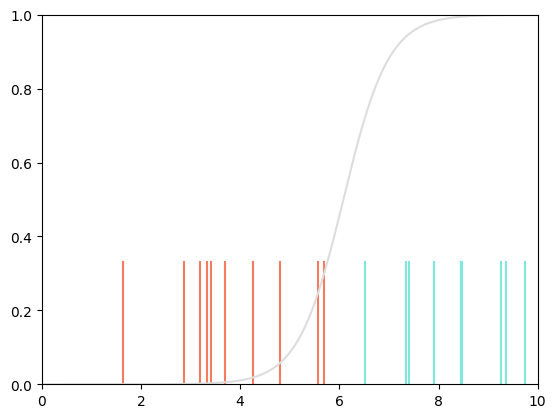

Updating discriminator
Initial discriminator loss =  1.2126795417817098
Final Discriminator Loss=  1.1659687237760292


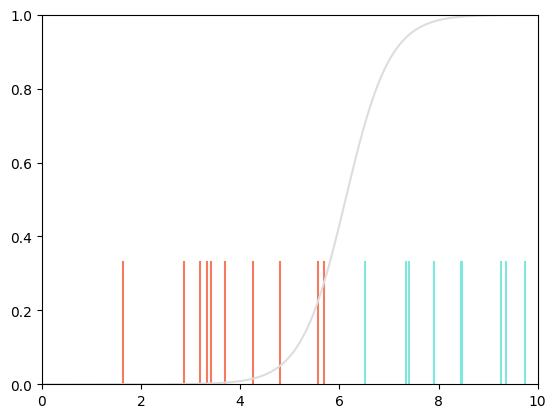

Updating generator
Initial generator loss =  0.6506102180516984
Final generator loss =  0.7608804091038792


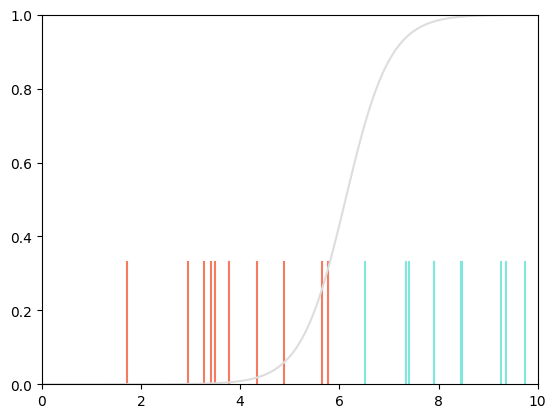

Updating discriminator
Initial discriminator loss =  1.2762389148282103
Final Discriminator Loss=  1.231275569518047


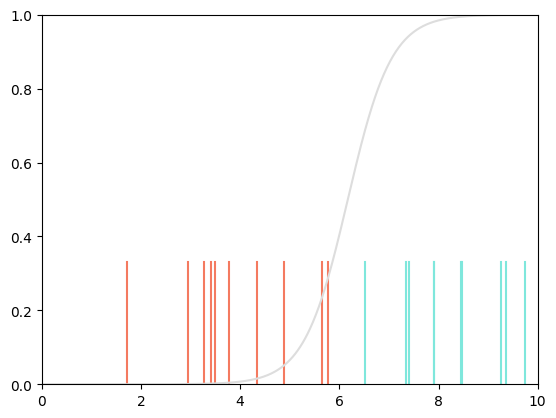

Updating generator
Initial generator loss =  0.6814117548685972
Final generator loss =  0.8059537461826216


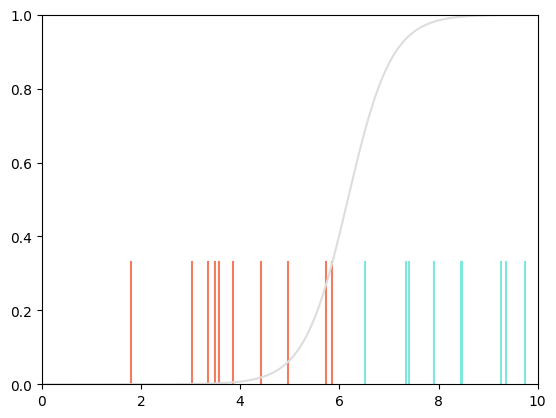

Updating discriminator
Initial discriminator loss =  1.3558175608320715
Final Discriminator Loss=  1.312183573827841


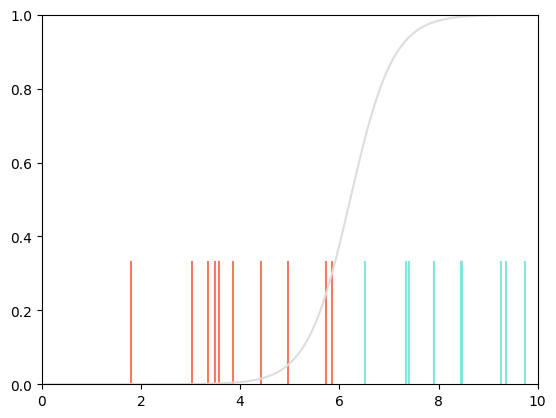

Updating generator
Initial generator loss =  0.7200823097501464
Final generator loss =  0.8625365686268548


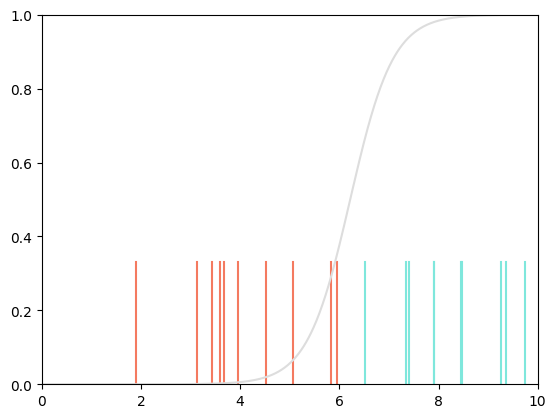

Updating discriminator
Initial discriminator loss =  1.4546378327045493
Final Discriminator Loss=  1.4119845851606905


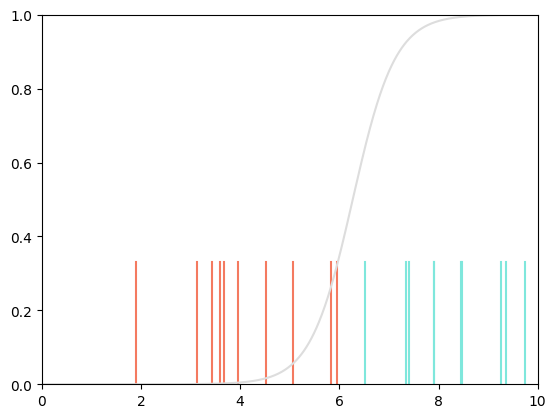

Updating generator
Initial generator loss =  0.7681397469681654
Final generator loss =  0.9332313180003327


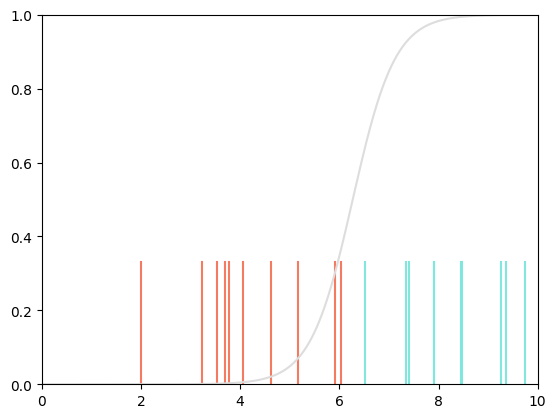

Updating discriminator
Initial discriminator loss =  1.5770761561928577
Final Discriminator Loss=  1.5351054772853776


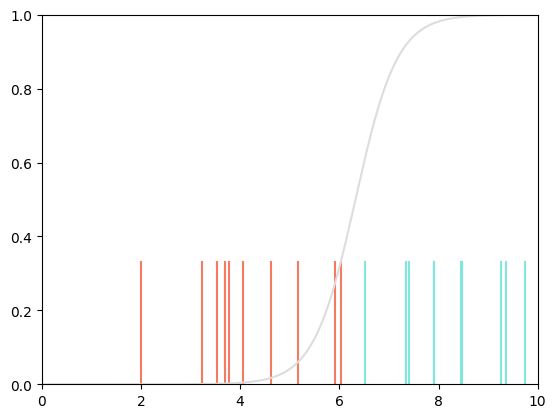

Updating generator
Initial generator loss =  0.8276450708953097
Final generator loss =  1.0215702750579088


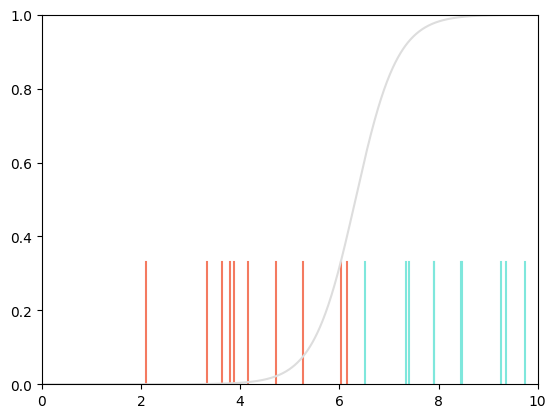

Updating discriminator
Initial discriminator loss =  1.7290306814479766
Final Discriminator Loss=  1.6874767780496207


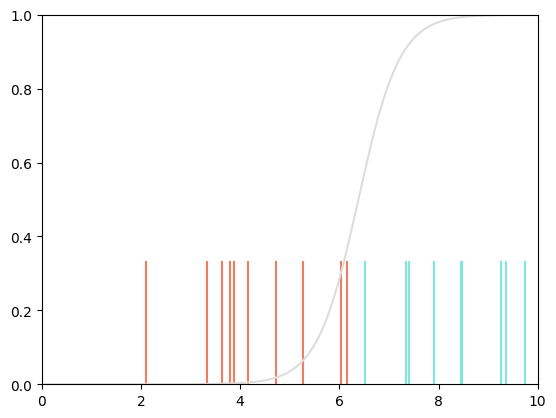

Updating generator
Initial generator loss =  0.9013801486897189
Final generator loss =  1.1323275686786995


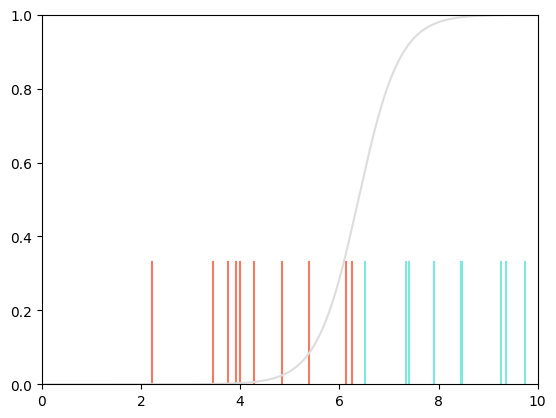

Updating discriminator
Initial discriminator loss =  1.9184241980386014
Final Discriminator Loss=  1.8770312538667075


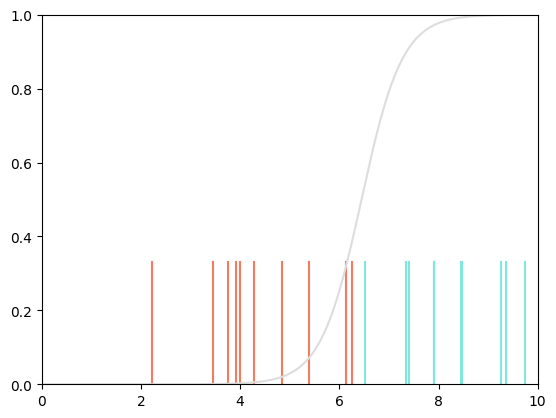

Updating generator
Initial generator loss =  0.9931007257308014
Final generator loss =  1.2719397367531475


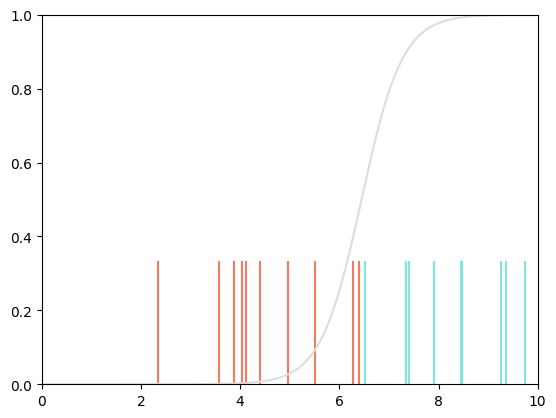

Updating discriminator
Initial discriminator loss =  2.1558702648890535
Final Discriminator Loss=  2.1143578780062064


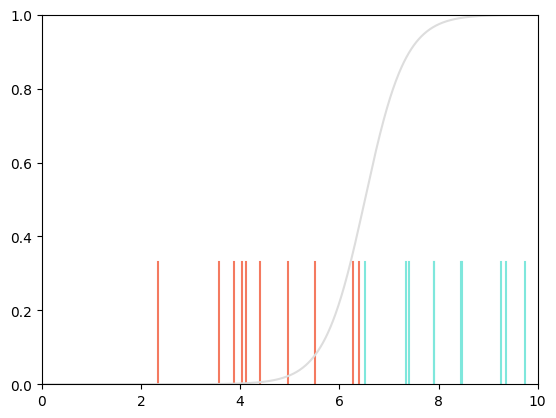

Updating generator
Initial generator loss =  1.1078944698068947
Final generator loss =  1.4490549069188507


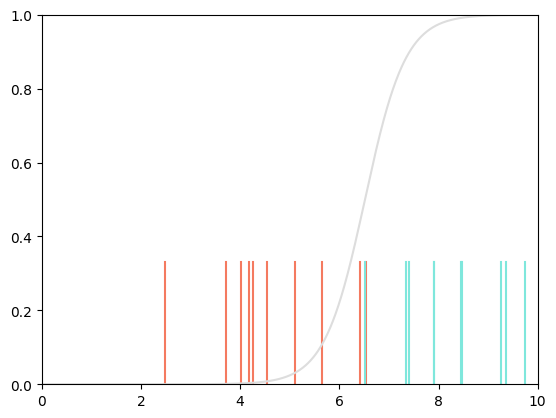

Updating discriminator
Initial discriminator loss =  2.4555183151181628
Final Discriminator Loss=  2.413521974190436


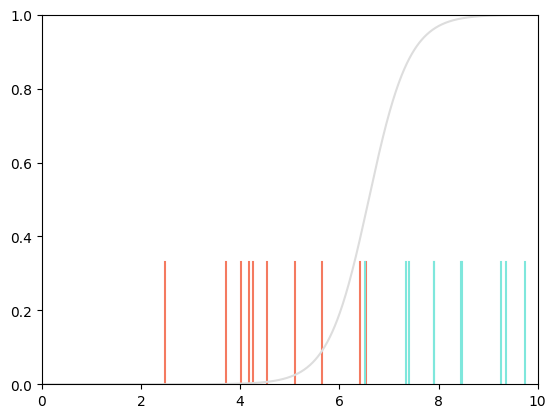

Updating generator
Initial generator loss =  1.2526837186083177
Final generator loss =  1.6752194091581842


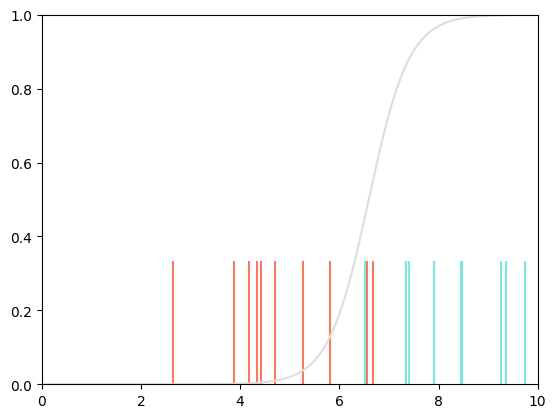

Updating discriminator
Initial discriminator loss =  2.836057664740303
Final Discriminator Loss=  2.7930208017004183


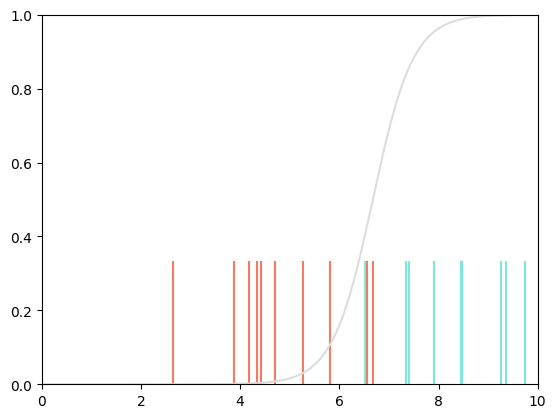

Updating generator
Initial generator loss =  1.4369140464269987
Final generator loss =  1.9656782711887744


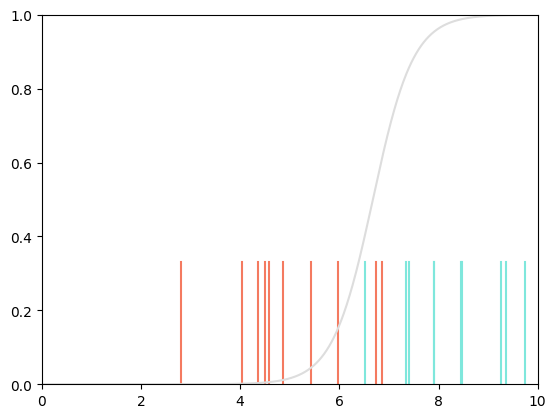

Updating discriminator
Initial discriminator loss =  3.3217850264621935
Final Discriminator Loss=  3.2767516276999897


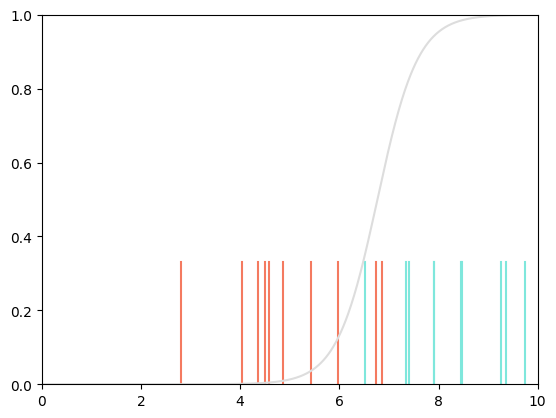

Updating generator
Initial generator loss =  1.6734276015860343
Final generator loss =  2.340180121985413


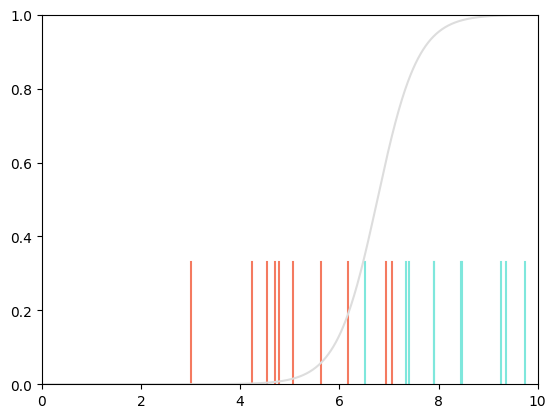

Updating discriminator
Initial discriminator loss =  3.9435041480993682
Final Discriminator Loss=  3.894687075804021


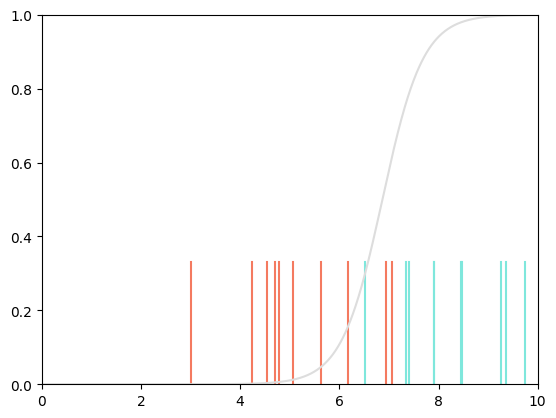

Updating generator
Initial generator loss =  1.9793424955444046
Final generator loss =  2.823454423890407


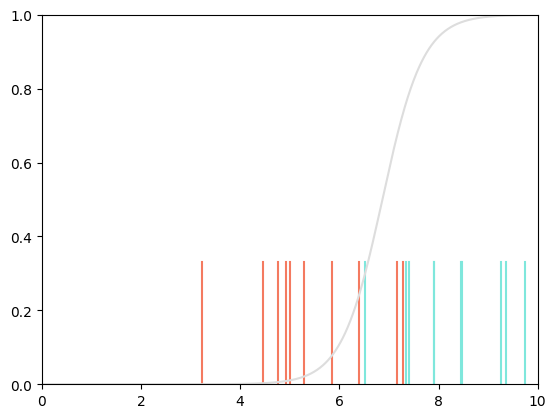

Updating discriminator
Initial discriminator loss =  4.738799004150024
Final Discriminator Loss=  4.682634814456894


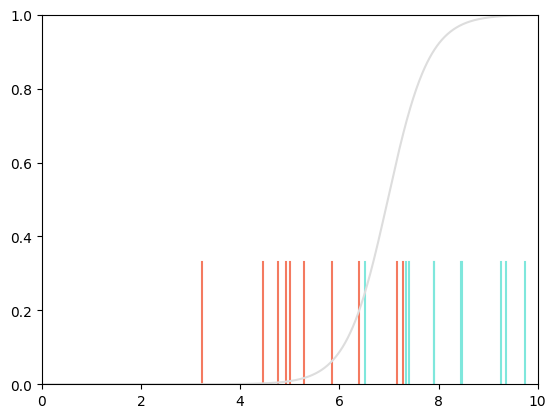

Updating generator
Initial generator loss =  2.37629675623396
Final generator loss =  3.444529581033712


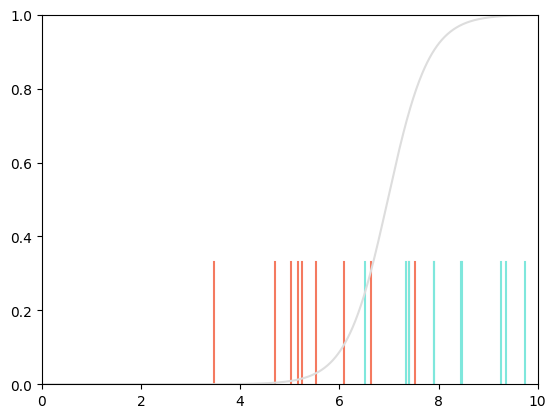

Updating discriminator
Initial discriminator loss =  5.750867639256646
Final Discriminator Loss=  5.680030315555694


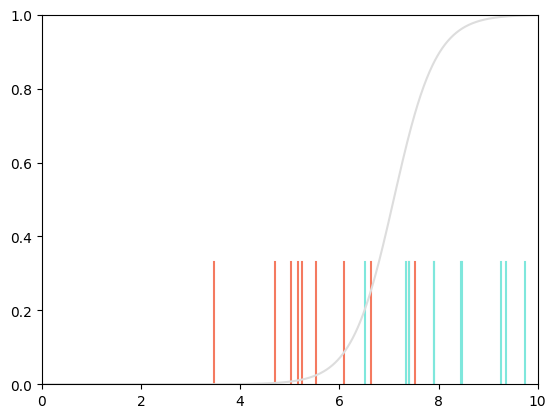

Updating generator
Initial generator loss =  2.8886373550077327
Final generator loss =  4.233216201757787


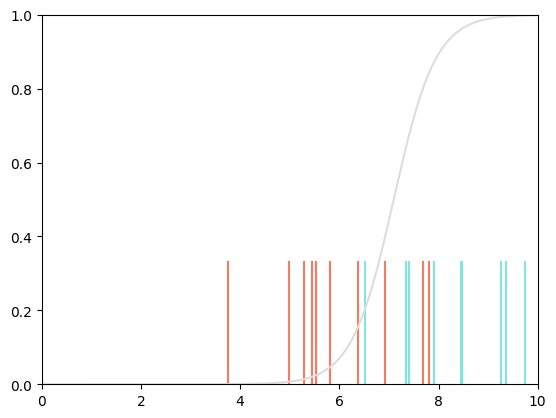

Updating discriminator
Initial discriminator loss =  7.024609162305747
Final Discriminator Loss=  6.9243764866253485


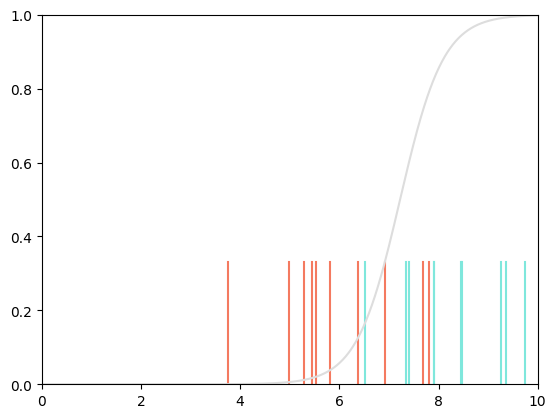

Updating generator
Initial generator loss =  3.53757975476196
Final generator loss =  5.211198880894874


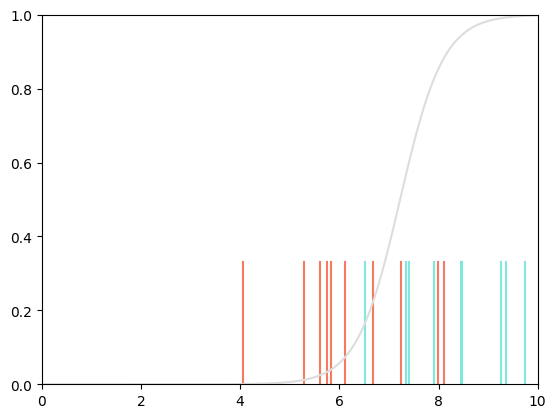

Updating discriminator
Initial discriminator loss =  8.597995612758263
Final Discriminator Loss=  8.440819274644253


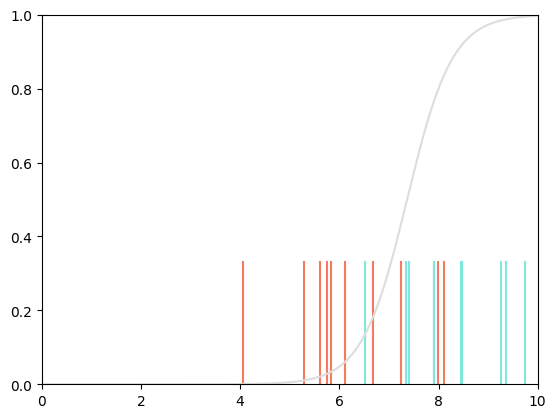

Updating generator
Initial generator loss =  4.330162032739994
Final generator loss =  6.375113457479153


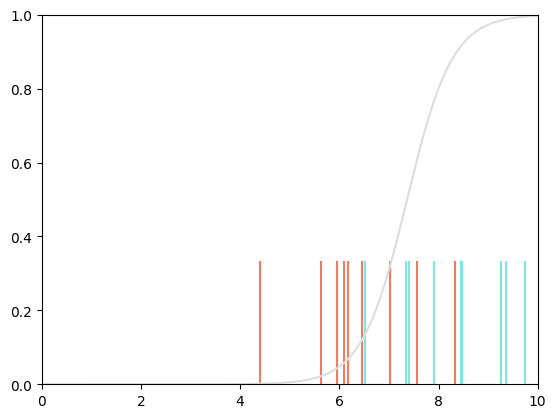

Updating discriminator
Initial discriminator loss =  10.485770699383412
Final Discriminator Loss=  10.224859522556248


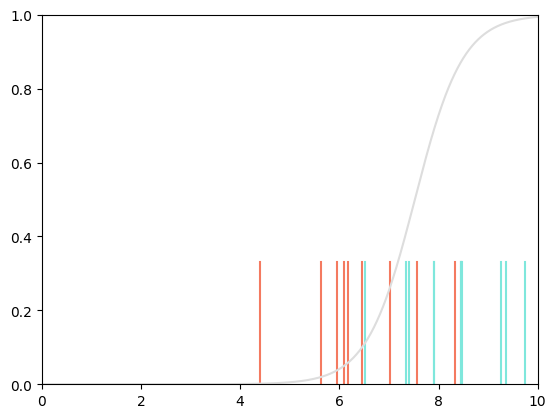

Updating generator
Initial generator loss =  5.244061804032372
Final generator loss =  7.6700658453054995


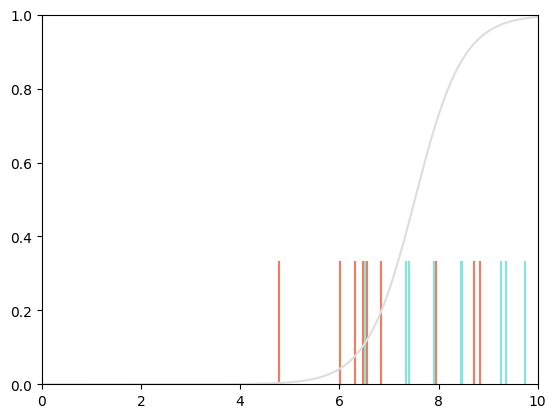

Updating discriminator
Initial discriminator loss =  12.650863563829375
Final Discriminator Loss=  12.214856133131828


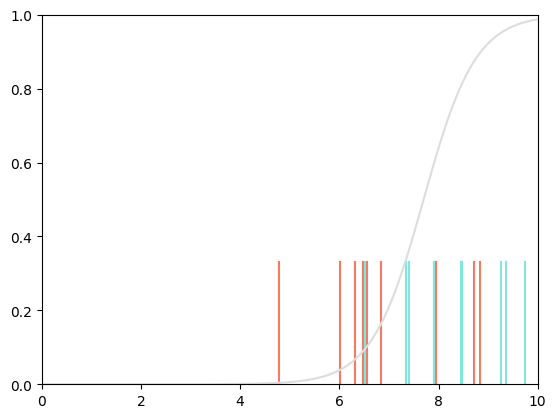

Updating generator
Initial generator loss =  6.211985278459369
Final generator loss =  8.95425768385343


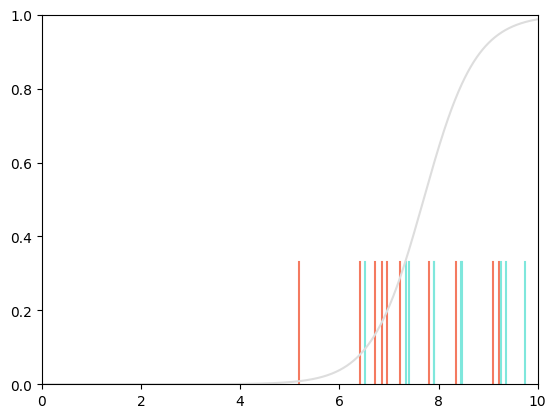

Updating discriminator
Initial discriminator loss =  14.95712853852589
Final Discriminator Loss=  14.251200672629839


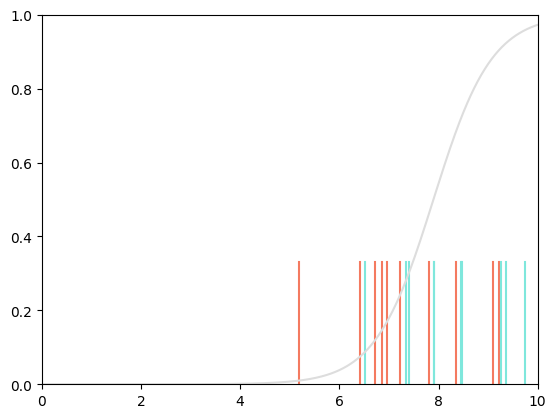

Updating generator
Initial generator loss =  7.11476152114265
Final generator loss =  9.97417708984427


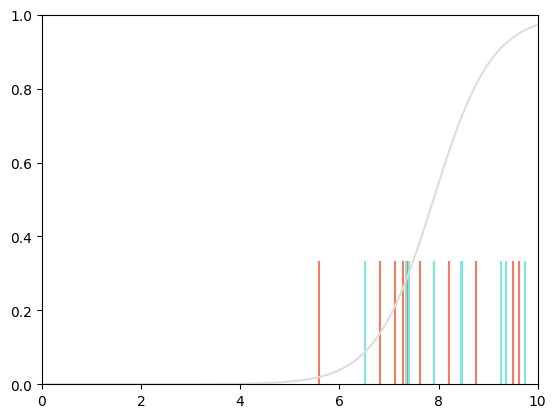

Updating discriminator
Initial discriminator loss =  17.11061624133146
Final Discriminator Loss=  20.987140284058626


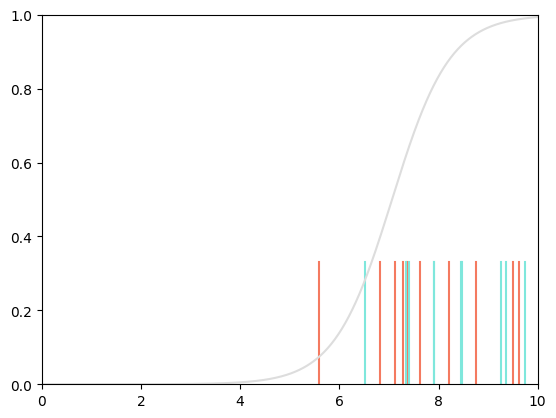

Updating generator
Initial generator loss =  18.15379771308237
Final generator loss =  27.81773629697494


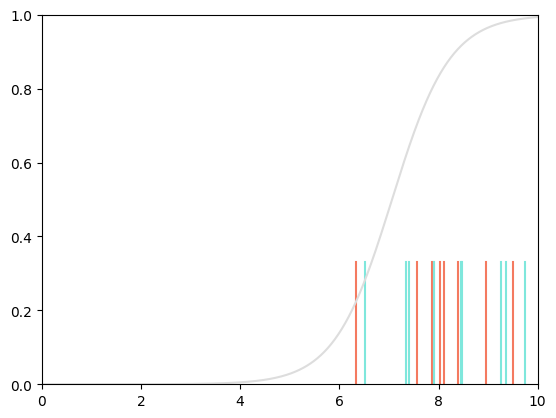

Updating discriminator
Initial discriminator loss =  30.651078867951195
Final Discriminator Loss=  34.34031202278631


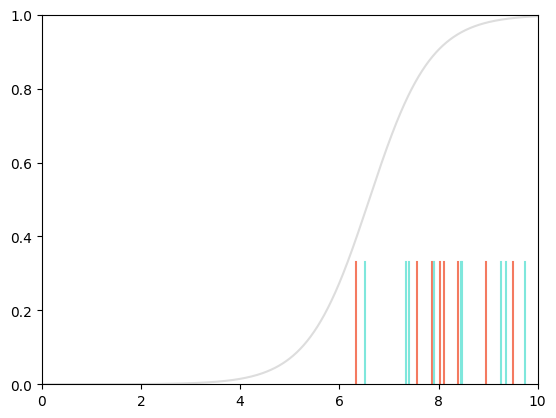

Updating generator
Initial generator loss =  32.71316726129104
Final generator loss =  45.91698803051924


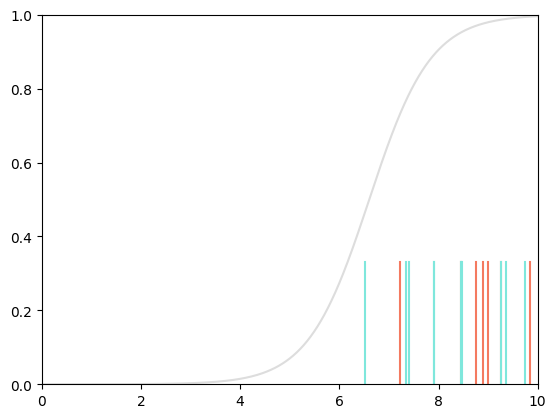

Updating discriminator
Initial discriminator loss =  47.54413279201451
Final Discriminator Loss=  39.40355958596085


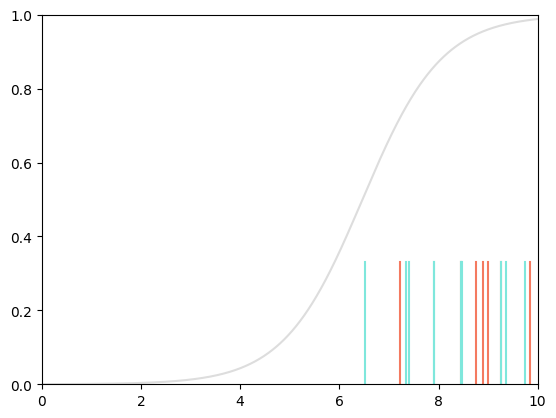

Updating generator
Initial generator loss =  37.65567779832202
Final generator loss =  46.340654399887434


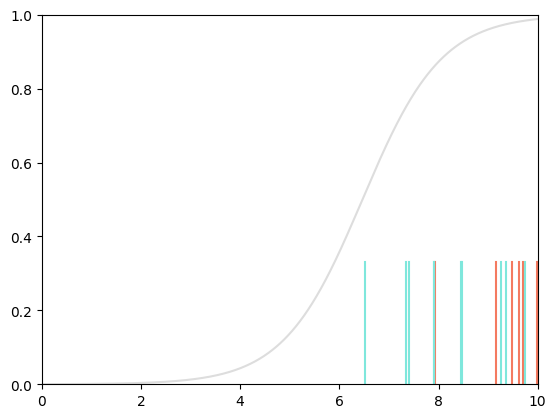

Updating discriminator
Initial discriminator loss =  48.088536187526266
Final Discriminator Loss=  33.50650396302177


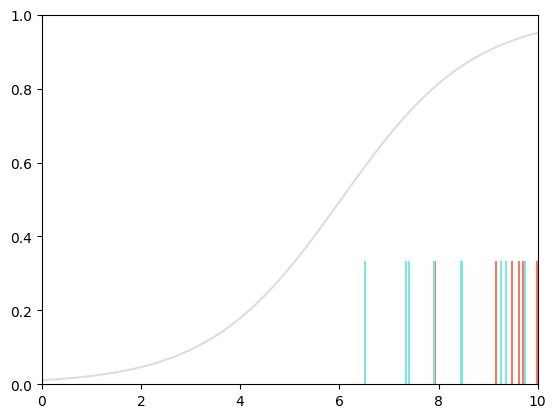

Updating generator
Initial generator loss =  31.389875760111657
Final generator loss =  34.40485517775801


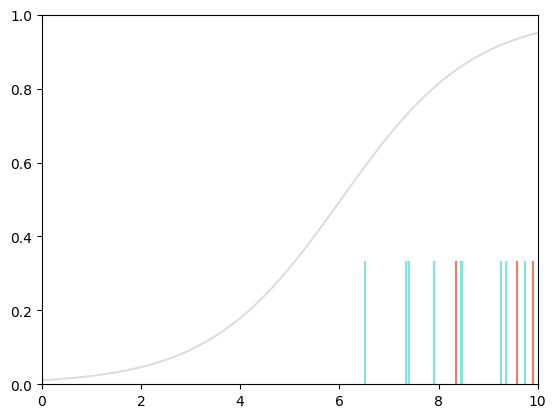

Updating discriminator
Initial discriminator loss =  36.52148338066812
Final Discriminator Loss=  25.161994159769545


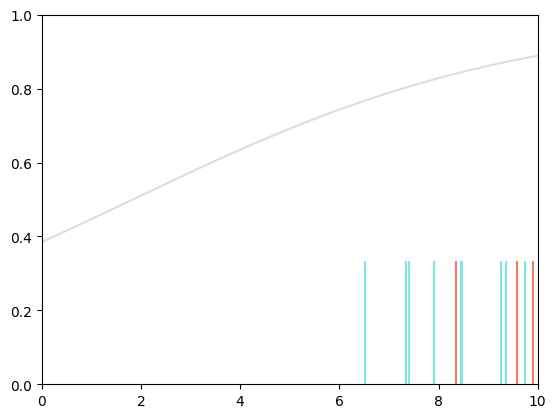

Updating generator
Initial generator loss =  23.33700412011818
Final generator loss =  23.65402270812637


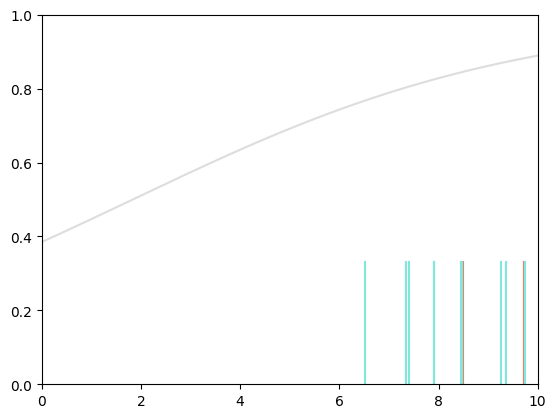

Updating discriminator
Initial discriminator loss =  25.479012747777734
Final Discriminator Loss=  25.50209023366471


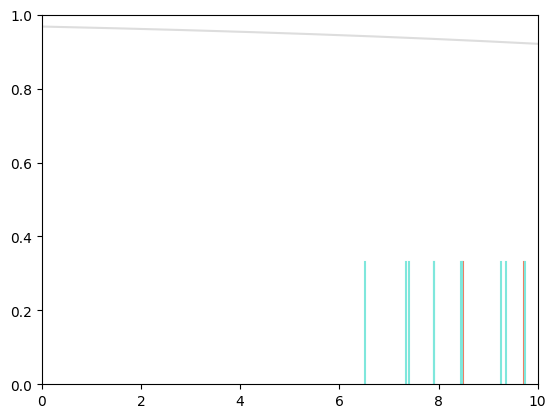

Updating generator
Initial generator loss =  24.800418746462327
Final generator loss =  24.845619928578476


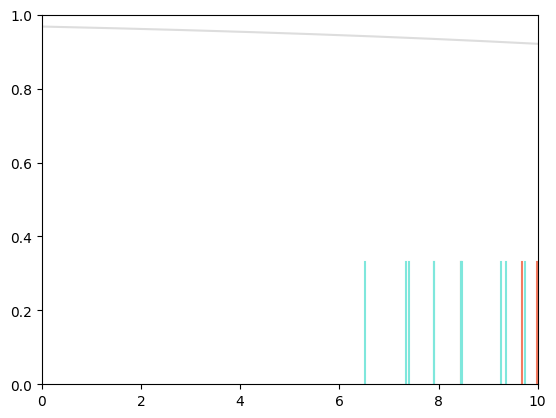

Updating discriminator
Initial discriminator loss =  25.547291415780858
Final Discriminator Loss=  20.718468807136436


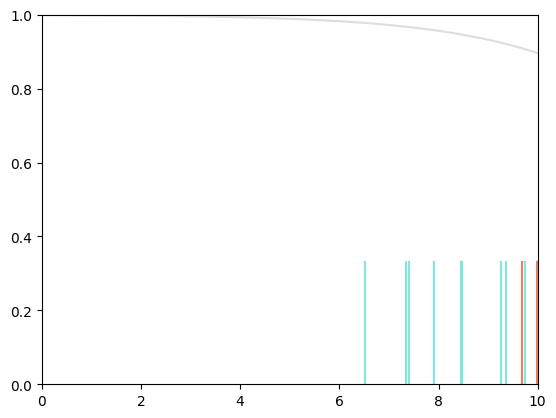

Updating generator
Initial generator loss =  20.173369183593806
Final generator loss =  21.128227753758257


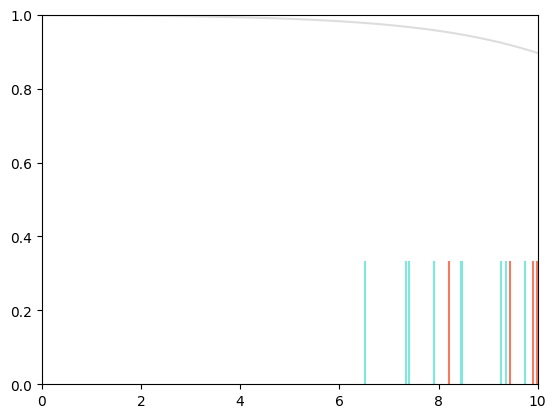

Updating discriminator
Initial discriminator loss =  21.673327377300886
Final Discriminator Loss=  18.253857154276762


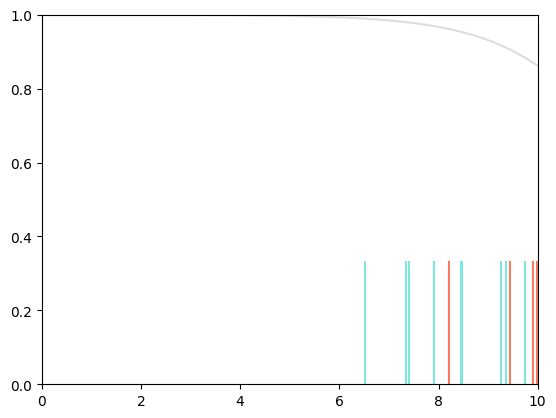

Updating generator
Initial generator loss =  17.738842879853106
Final generator loss =  20.043351179472104


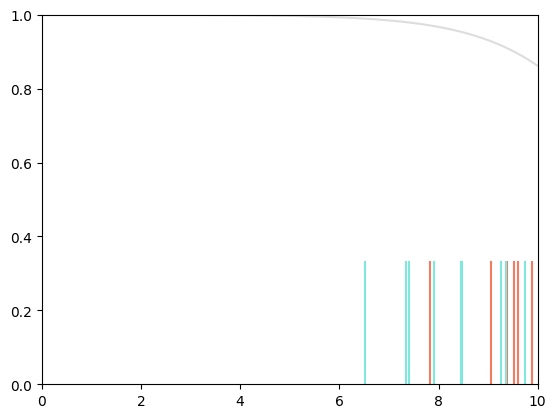

Updating discriminator
Initial discriminator loss =  20.55836545389576
Final Discriminator Loss=  18.761211665061793


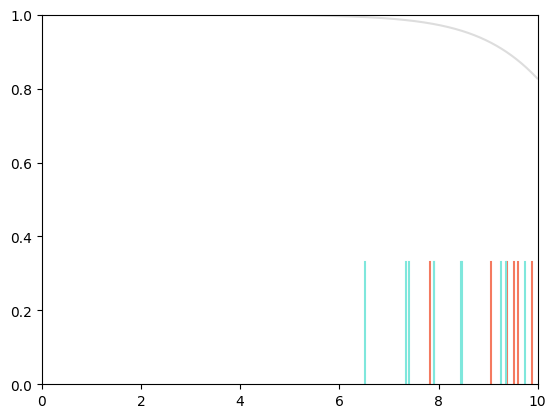

Updating generator
Initial generator loss =  18.23122014104276
Final generator loss =  21.97834747933511


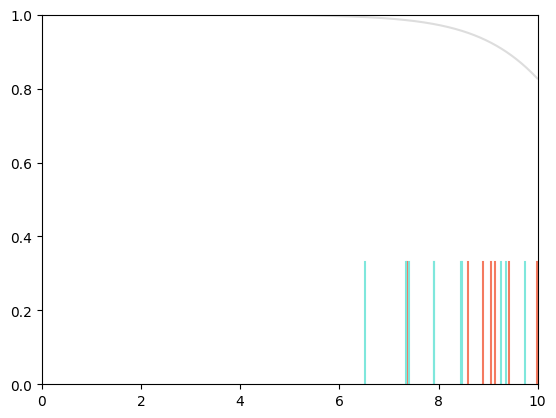

Updating discriminator
Initial discriminator loss =  22.508339003354145
Final Discriminator Loss=  20.285894739775127


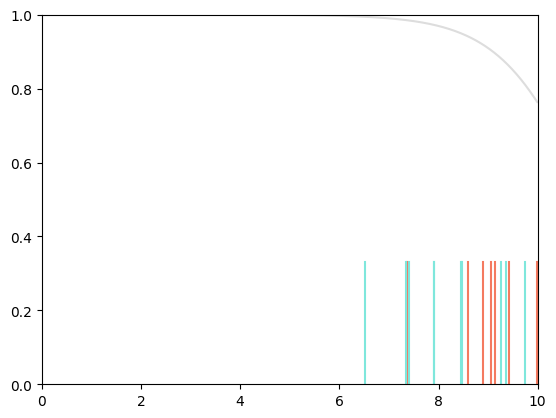

Updating generator
Initial generator loss =  19.612556485941106
Final generator loss =  24.718180233996254


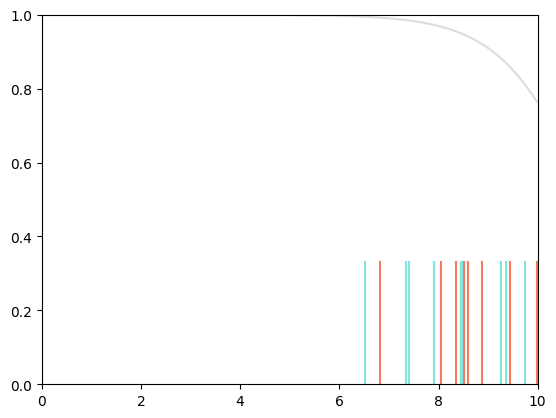

Updating discriminator
Initial discriminator loss =  25.391518487830275
Final Discriminator Loss=  23.035372622357578


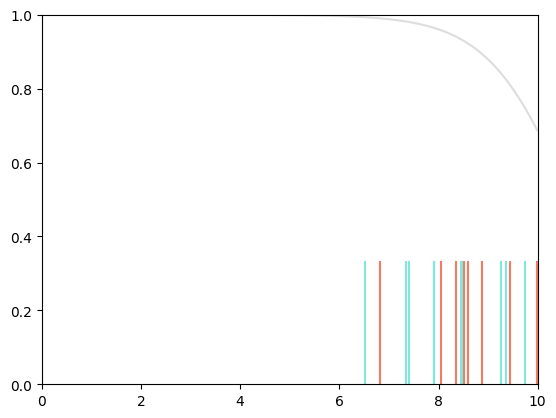

Updating generator
Initial generator loss =  22.120119380146612
Final generator loss =  28.220957388938515


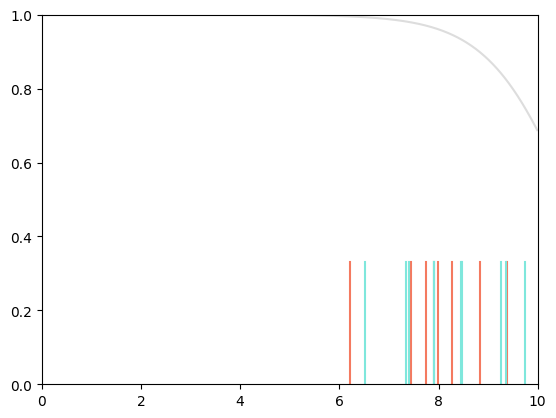

Updating discriminator
Initial discriminator loss =  29.13621063114948
Final Discriminator Loss=  26.442206436779827


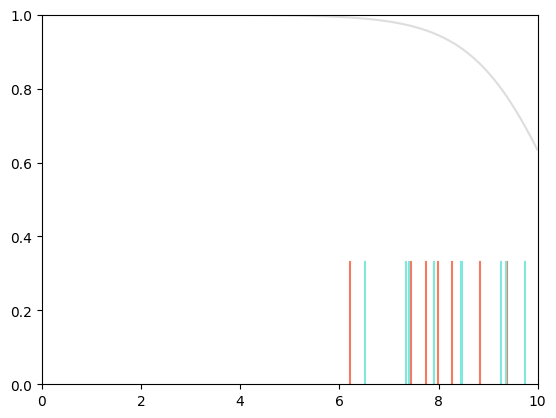

Updating generator
Initial generator loss =  25.24913352611348
Final generator loss =  31.310125591613886


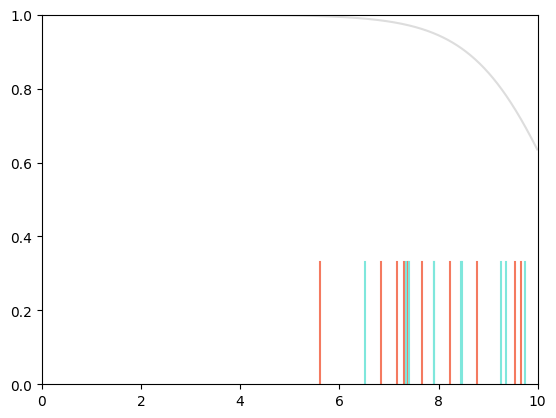

Updating discriminator
Initial discriminator loss =  32.503198502280235
Final Discriminator Loss=  29.190848822944417


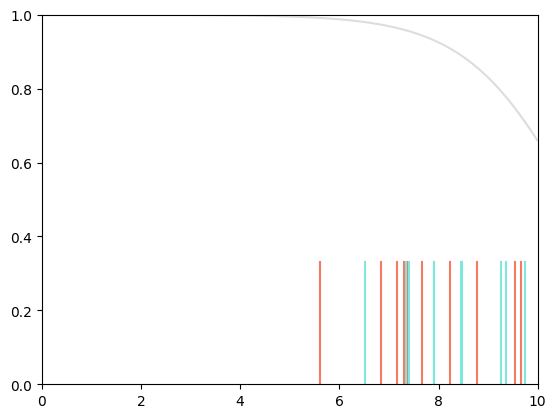

Updating generator
Initial generator loss =  27.875930670681896
Final generator loss =  32.21699602548432


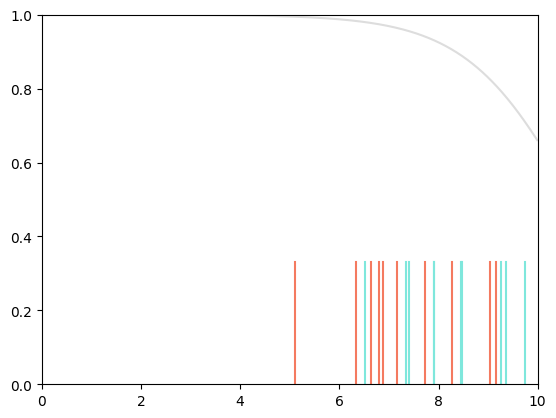

Updating discriminator
Initial discriminator loss =  33.53191417774684
Final Discriminator Loss=  30.327652340217288


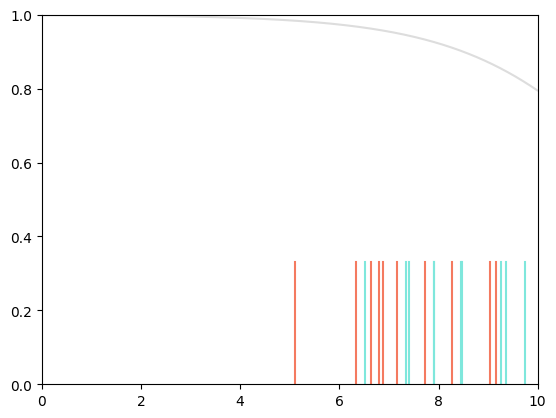

Updating generator
Initial generator loss =  29.288987279537707
Final generator loss =  30.958175263108608


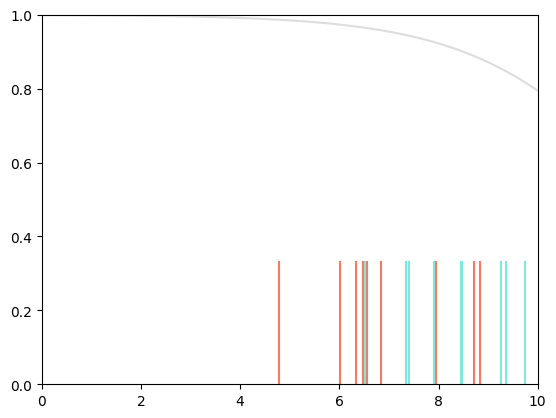

Updating discriminator
Initial discriminator loss =  31.996840323788188
Final Discriminator Loss=  29.813410067328743


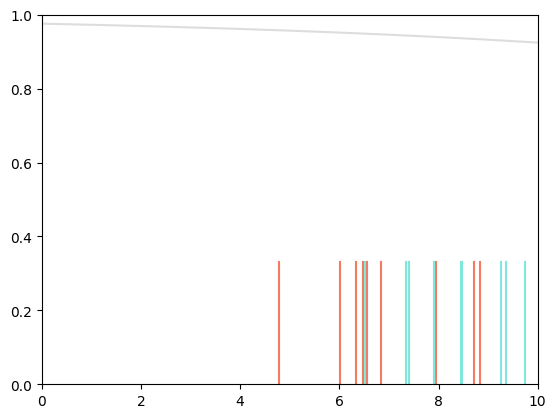

Updating generator
Initial generator loss =  29.167344301455664
Final generator loss =  29.242894651108074


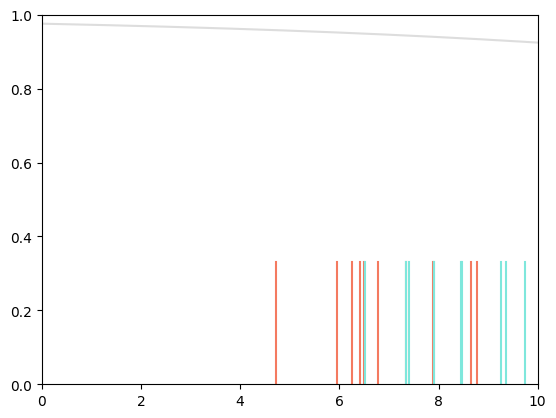

Updating discriminator
Initial discriminator loss =  29.888960416981153
Final Discriminator Loss=  28.409596622022566


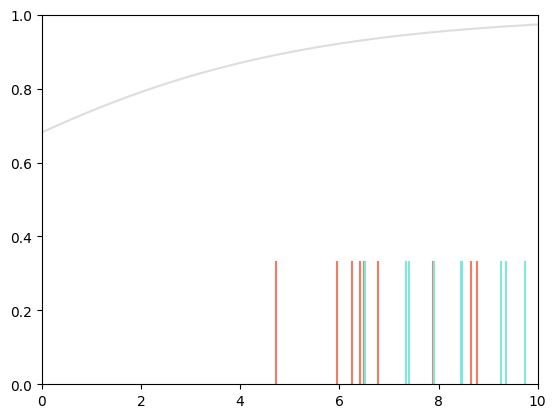

Updating generator
Initial generator loss =  27.953612446057544
Final generator loss =  28.379048374498023


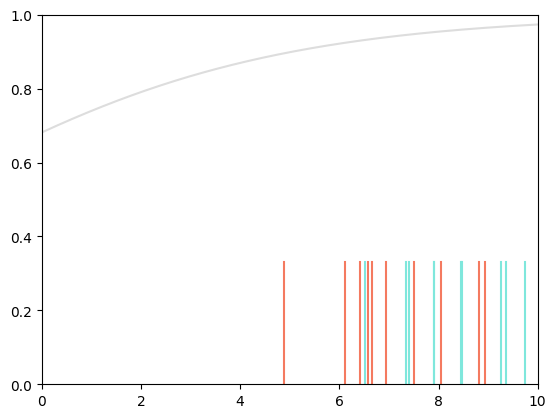

Updating discriminator
Initial discriminator loss =  28.835032550463044
Final Discriminator Loss=  27.694619041594418


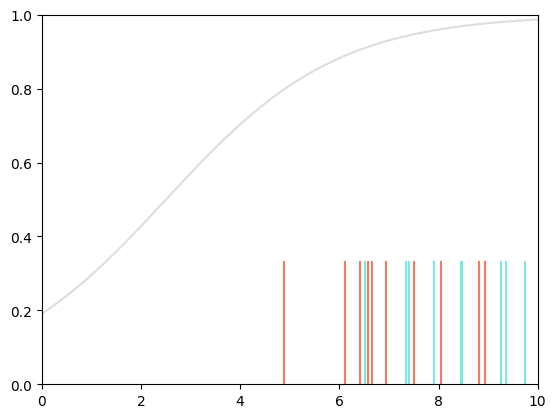

Updating generator
Initial generator loss =  27.27925619909216
Final generator loss =  28.991736992228518


In [16]:
# Now let's define a full GAN loop

# Initialize the parameters
theta = 3
phi0 = -2
phi1 = 1

# Number of iterations for updating generator and discriminator
n_iter_discrim = 300
n_iter_gen = 3

print("Final parameters (phi0,phi1)", phi0, phi1)
for c_gan_iter in range(50):

  # Run generator to product synthesized data
  x_syn = generator(z, theta)
  draw_data_model(x_real, x_syn, phi0, phi1)

  # Update the discriminator
  print("Updating discriminator")
  phi0, phi1 = update_discriminator(x_real, x_syn, n_iter_discrim, phi0, phi1)
  draw_data_model(x_real, x_syn, phi0, phi1)

  # Update the generator
  print("Updating generator")
  theta = update_generator(z, theta, n_iter_gen, phi0, phi1)


You can see that the synthesized data (orange) is becoming closer to the true data (cyan).  However, this is extremely unstable -- as you will find if you mess around with the number of iterations of each optimization and the total iterations overall.